In [35]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [36]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>
100%|██████████| 3/3 [00:06<00:00,  2.12s/engine]


In [37]:
%%px --targets all

import sys
import os
sys.path.append(os.getcwd())

seeds = [11,12]
learning_rates = [0.001, 0.01]

dfca_li = []
dfca_gi = []
ifca = []

In [38]:
LR_DECAY = False

seeds = [11,12]
learning_rates = [0.001, 0.01]

dfca_li = []
dfca_gi = []
ifca = []

def get_dfca_gi_config():

    # read config json and update the sysarg
    with open("config_dfca_gi.json", "r") as read_file:
        config = json.load(read_file)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

def get_ifca_config():

    # read config json and update the sysarg
    with open("config_ifca.json", "r") as read_file:
        config = json.load(read_file)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

def get_dfca_li_config():

    # read config json and update the sysarg
    with open("config_dfca_li.json", "r") as read_file:
        config = json.load(read_file)

    if config["config_override"] == "":
        del config['config_override']
    else:
        print(config['config_override'])
        config_override = json.loads(config['config_override'])
        del config['config_override']
        config.update(config_override)

    return config

Running the dfca-gi experiment

In [ ]:
%%px --target 0 --noblock
import dfca as DFCA
import json

with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([res['test']['loss'], res['test']['acc'], res['test']['cl_acc']])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



%px: 100%|██████████| 1/1 [00:02<00:00,  2.51s/tasks]


[0:execute]
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[2], line 4
      1 import dfca as DFCA
      3 with open("config_dfca_gi.json", "r") as read_file:
----> 4     config = json.load(read_file)
      6 for lr in learning_rates:
      7     config['lr'] = lr

NameError: name 'json' is not defined


RemoteError: [0:execute] NameError: name 'json' is not defined

Running the dfca-li experiment


In [ ]:
%%px --target 1 --noblock
import dfca as DFCA

with open("config_dfca_li.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([res['test']['loss'], res['test']['acc'], res['test']['cl_acc']])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_li.append(res_mean)



config: {'m': 1200, 'm_test': 200, 'p': 2, 'n': 200, 'uneven': True, 'local_model_init': True, 'h1': 128, 'num_epochs': 100, 'batch_size': 100, 'tau': 5, 'lr': 0.05, 'data_seed': 10, 'train_seed': 10, 'project_dir': 'output_dfca'}
Using device: cuda
Epoch -1 tr: l 3.848 a 0.023 clct[582, 618] cl_acc 0.512  1.635sec
Epoch -1 tst: l 3.848 a 0.028 clct[100, 100] cl_acc 0.510  0.582sec
Epoch 0 tr: l 3.848 a 0.025 clct[596, 604] cl_acc 0.510  lr 0.050000 24.952sec(train) 1.186sec(infer)
Epoch 0 tst: l 3.848 a 0.029 clct[91, 109] cl_acc 0.585  0.572sec
result written at output_dfca/results.pickle
checkpoint written at output_dfca/checkpoint.pt
Epoch 1 tr: l 3.849 a 0.024 clct[604, 596] cl_acc 0.510  lr 0.050000 25.654sec(train) 1.175sec(infer)
Epoch 1 tst: l 3.849 a 0.030 clct[98, 102] cl_acc 0.520  0.568sec
Epoch 2 tr: l 3.849 a 0.025 clct[619, 581] cl_acc 0.517  lr 0.050000 26.952sec(train) 1.181sec(infer)
Epoch 2 tst: l 3.850 a 0.029 clct[87, 113] cl_acc 0.535  0.561sec
Epoch 3 tr: l 3.85

KeyboardInterrupt: 

Running the ifca experiment

In [ ]:
%%px --target 2 --noblock
import ifca as IFCA

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([res['test']['loss'], res['test']['acc'], res['test']['cl_acc']])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



config: {'m': 600, 'm_test': 100, 'p': 2, 'n': 400, 'uneven': True, 'h1': 128, 'num_epochs': 100, 'batch_size': 100, 'tau': 5, 'lr': 0.001, 'data_seed': 10, 'train_seed': 10, 'project_dir': 'output_ifca'}
Using device: cuda


Epoch -1 tr: l 3.848 a 0.024 clct[351, 249] cl_acc 0.528  0.633sec
Epoch -1 tst: l 3.848 a 0.025 clct[50, 50] cl_acc 0.520  0.105sec
Epoch 0 tr: l 3.848 a 0.024 clct[351, 249] cl_acc 0.528  lr 0.001000 3.898sec(train) 0.630sec(infer)
Epoch 0 tst: l 3.848 a 0.025 clct[50, 50] cl_acc 0.520  0.105sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 3.848 a 0.024 clct[350, 250] cl_acc 0.530  lr 0.001000 4.033sec(train) 0.632sec(infer)
Epoch 1 tst: l 3.848 a 0.025 clct[50, 50] cl_acc 0.520  0.105sec
Epoch 2 tr: l 3.848 a 0.024 clct[350, 250] cl_acc 0.530  lr 0.001000 3.904sec(train) 0.631sec(infer)
Epoch 2 tst: l 3.848 a 0.025 clct[50, 50] cl_acc 0.520  0.105sec
Epoch 3 tr: l 3.848 a 0.024 clct[349, 251] cl_acc 0.532  lr 0.001000 4.022sec(train) 0.631sec(infer)
Epoch 3 tst: l 3.848 a 0.025 clct[50, 50] cl_acc 0.520  0.105sec
Epoch 4 tr: l 3.848 a 0.024 clct[349, 251] cl_acc 0.532  lr 0.001000 3.899sec(train) 0.630sec(infer)
Epoch 4 t

Experiment Final Results: 

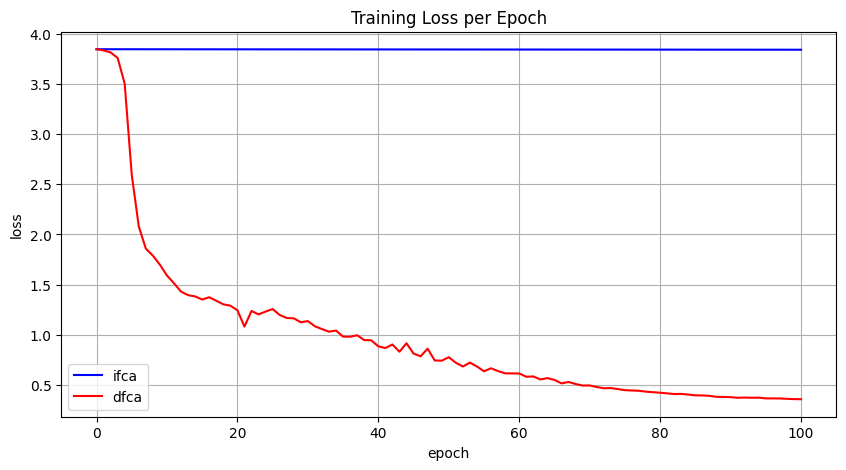

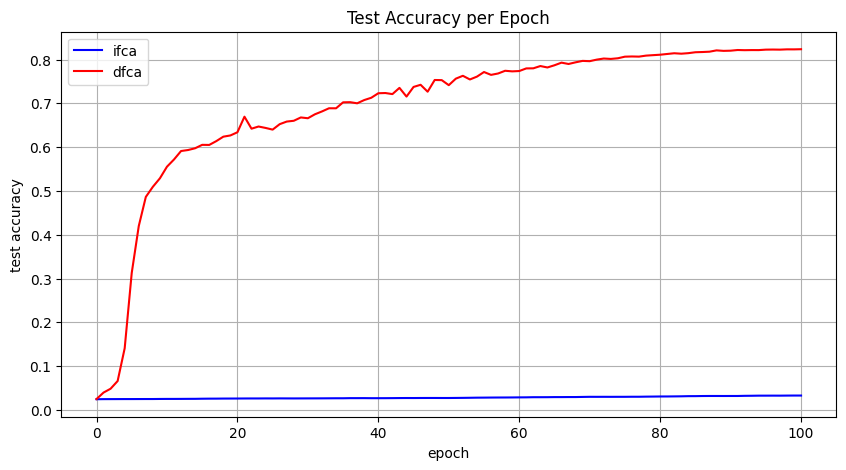

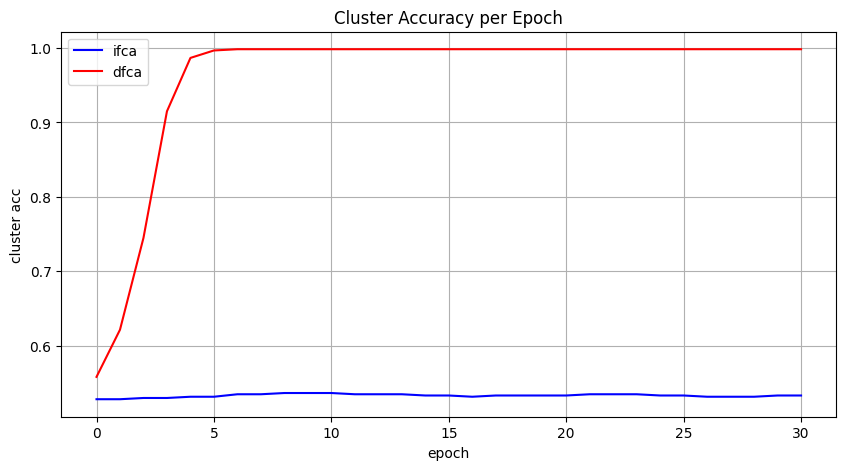

In [ ]:
dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_li = rc[1].pull('dfca_li', block=True)
ifca = rc[2].pull('ifca', block=True)

os.makedirs('graphs', exist_ok=True)

plt.figure(figsize=(10,5))
plt.plot([r['test']['loss'] for r in ifca], label='ifca', color='blue')
plt.plot([r['test']['loss'] for r in dfca_li], label='dfca-li', color='red')
plt.plot([r['test']['loss'] for r in dfca_gi], label='dfca-gi', color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Test Loss per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'train_loss.png'))

plt.figure(figsize=(10,5))
plt.plot([r['test']['acc'] for r in ifca], label='ifca', color='blue')
plt.plot([r['test']['acc'] for r in dfca_li], label='dfca-li', color='red')
plt.plot([r['test']['acc'] for r in dfca_gi], label='dfca-gi', color='green')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('Test Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'test_acc.png'))

plt.figure(figsize=(10,5))
plt.plot([r['test']['cl_acc'] for r in ifca[:3]], label='ifca', color='blue')
plt.plot([r['test']['cl_acc'] for r in dfca_li[:3]], label='dfca-li', color='red')
plt.plot([r['test']['cl_acc'] for r in dfca_gi[:3]], label='dfca-gi', color='green')
plt.xlabel('epoch')
plt.ylabel('cluster acc')
plt.title('Cluster Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('graphs', 'cluster_acc.png'))